In [5]:
#import Libs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load DataSet

In [6]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [8]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [9]:
df_cat_value = df['Category'].value_counts()
df_cat_value.sort_values(ascending=False)

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Sales                        40
Mechanical Engineer          40
Operations Manager           40
ETL Developer                40
Blockchain                   40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

# Data Visualization


<AxesSubplot:xlabel='count', ylabel='Category'>

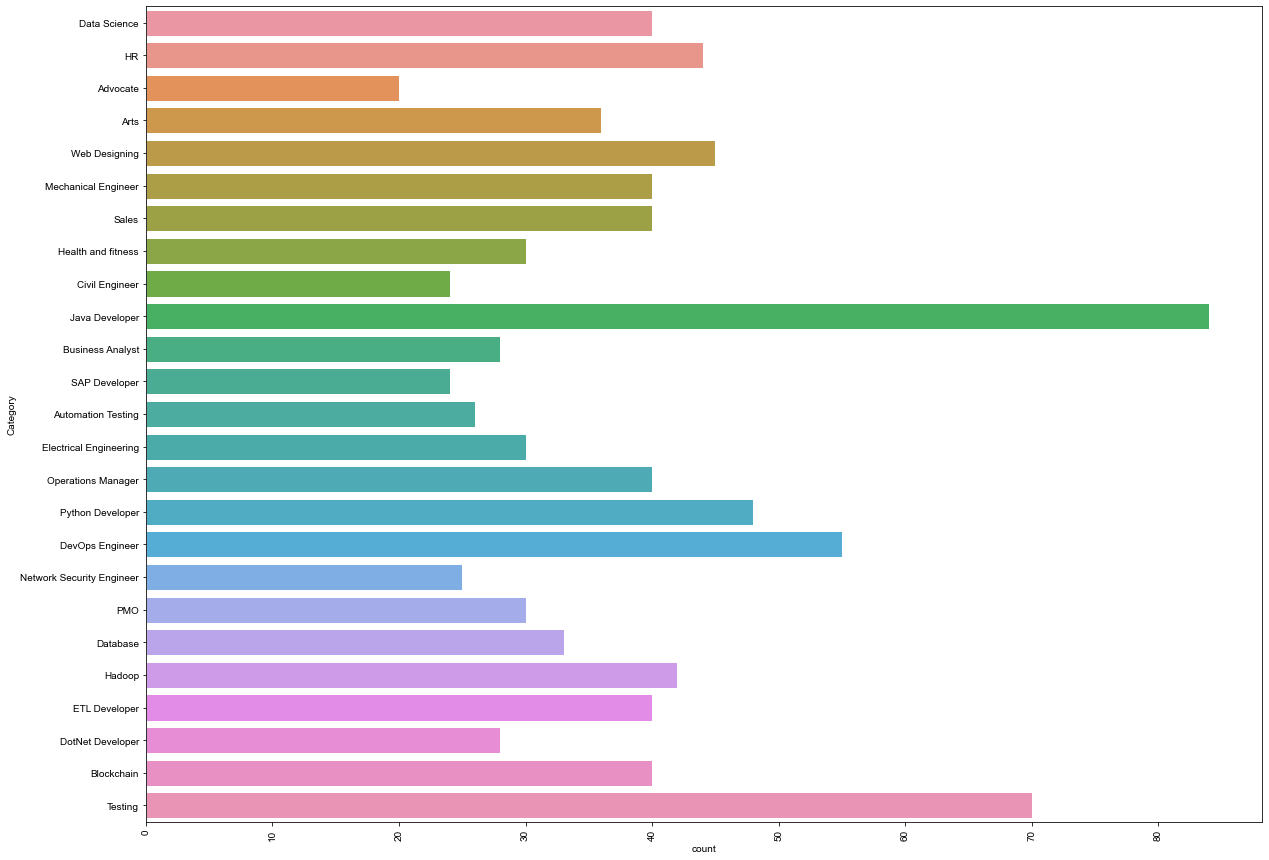

In [10]:
import seaborn as sns
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
sns.set_theme(font_scale=1.5)
sns.countplot(y= 'Category', data=df)


# Data Cleaning 

In [11]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [12]:
import re
import string
def clean_data(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('â', '', text)
    text = re.sub('\w*\d\w*', '', text)
      # Remove extra spaces
    text = re.sub('\s+', " ", text)
    
    return text


In [13]:
df['New_Resume'] = df['Resume'].apply(clean_data)
df.head(20)

,Category,Resume,New_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may to may b e uit rgpv data...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci...",skills c basics iot python matlab data science...
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,skills python tableau data visualization r stu...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...,education details b tech rayat and bahra insti...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,personal skills ability to quickly grasp techn...
9,Data Science,Expertise â Data and Quantitative Analysis â...,expertise data and quantitative analysis decis...


# Model Implement 

In [14]:
df.head()

,Category,Resume,New_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may to may b e uit rgpv data...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


## Label Encoding


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [52]:
le.fit(df['Category'])
df['Category'] = le.fit_transform(df['Category'])
df.head()

,Category,Resume,New_Resume
0,6,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,education details may to may b e uit rgpv data...
2,6,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


## Tfidfvectorizer Transform 

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()

In [86]:
x = df['New_Resume'].values
y = df['Category'].values


In [39]:
x_tfid = tfid.fit_transform(x)

## Train Model 

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_tfid, y, test_size=0.2)

## Import Model 

In [44]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [46]:
mnb.fit(x_train, y_train)

MultinomialNB()

In [100]:
type(x_test)

scipy.sparse._csr.csr_matrix

In [49]:
y_pre = mnb.predict(x_test)

In [51]:
y_pre

array([10, 15,  7, 19, 14, 20,  3, 20,  6, 15, 18, 15,  6, 15, 11, 11, 20,
        6, 20, 24,  6, 15, 12, 16, 11, 24, 20, 13, 21, 22,  3, 17,  7, 12,
       16,  8, 19,  4, 23, 14, 15, 23, 15, 21,  1, 19, 12, 15, 20,  3, 18,
       15,  4, 17, 23, 20, 23,  8, 19,  7, 15, 13, 24, 16, 16, 15,  3,  8,
        6,  1, 15, 10, 19, 20, 18,  8,  2, 15, 15, 16,  3, 18,  3, 11, 10,
       24,  4, 17, 23,  8, 23, 15,  9,  1, 12, 10,  3, 15, 23, 15,  8, 15,
        5, 15, 15,  7, 10, 23, 15,  2, 10, 15, 16, 12,  3, 16, 22, 18, 18,
        1, 22,  8, 23,  7, 16, 13, 17, 18, 20, 19, 11,  4, 15, 20,  2, 15,
       19, 10,  8, 13, 23, 23, 10,  1,  8,  2, 15, 10,  3, 15,  6, 20, 16,
       18, 18,  1, 15, 15, 13, 22, 10, 22, 10,  2, 22, 23, 22, 24, 20, 22,
       23, 15,  4, 20, 16, 16,  3, 18, 10, 23,  4, 24, 12, 23, 13,  4,  7,
       11, 17, 15, 15, 24, 18])

In [135]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [136]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [137]:

kn_y_pre = kn.predict(x_test)

In [138]:
accuracy_score(y_test, kn_y_pre)

0.9740932642487047

## Cheak Accuracy 

In [131]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [141]:
print(" MultinomialNB Score =",accuracy_score(y_test, y_pre)*100)

 MultinomialNB Score = 91.19170984455958


In [142]:
print(" KNeighborsClassifier =", accuracy_score(y_test, kn_y_pre)*100)

 KNeighborsClassifier = 97.40932642487047
